### Import File

In [2]:
from PIL import Image

In [3]:
def split_image_into_grid(image_path, grid_size):
    # Open the image
    image = Image.open(image_path)
    width, height = image.size

    height_width_min = min([width,height])
    
    # Calculate the size of each square
    square_width = height_width_min // grid_size
    square_height = height_width_min // grid_size
    
    # Split the image into grid squares
    grid_images = []
    for row in range(grid_size):
        for col in range(grid_size):
            left = col * square_width
            upper = row * square_height
            right = (col + 1) * square_width
            lower = (row + 1) * square_height
            grid_images.append(image.crop((left, upper, right, lower)))
    
    return grid_images, square_width, square_height

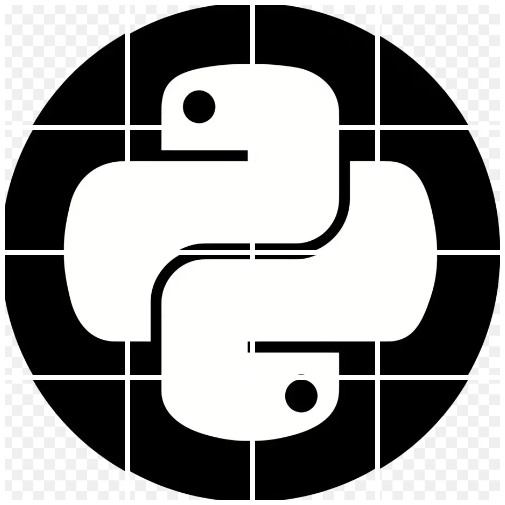

In [4]:
def remerge_grid_images(grid_images, grid_size, square_width, square_height, border_width, background_color):
    # Calculate the size of the new image
    new_width = grid_size * (square_width + border_width) + border_width
    new_height = grid_size * (square_height + border_width) + border_width
    
    # Create a new image with the specified background color
    new_image = Image.new('RGB', (new_width, new_height), background_color)
    
    # Paste the grid images into the new image with the border
    for index, img in enumerate(grid_images):
        row = index // grid_size
        col = index % grid_size
        left = col * (square_width + border_width) + border_width
        upper = row * (square_height + border_width) + border_width
        new_image.paste(img, (left, upper))
    
    return new_image

# Example usage
image_path = r'image\python.PNG'
grid_size = 4  # Number of squares along one dimension
border_width = 5  # Width of the border between squares
background_color = 'white'  # Background color ('white' or 'black')

grid_images, square_width, square_height = split_image_into_grid(image_path, grid_size)
merged_image = remerge_grid_images(grid_images, grid_size, square_width, square_height, border_width, background_color)

# Save the merged image
#merged_image.save('merged_image.png')

# Display the merged image
# merged_image.show()
display(merged_image)

In [5]:
def color_distance(c1, c2):
    return sum((a-b)**2 for a, b in zip(c1, c2)) ** 0.5

def closest_color(pixel, colors):
    distances = [color_distance(pixel, color) for color in colors]
    return colors[distances.index(min(distances))]

def convert_to_closest_color(grid_images, colors):
    converted_images = []
    for img in grid_images:
        # Convert image to a small thumbnail to calculate average color
        img_thumbnail = img.resize((1, 1))
        avg_color = img_thumbnail.getpixel((0, 0))
        
        # Determine the closest color from the list
        closest = closest_color(avg_color, colors)
        
        # Create a new image with the closest color
        new_img = Image.new('RGB', img.size, closest)
        converted_images.append(new_img)
    return converted_images


### Interactive

In [6]:
from PIL import Image, ImageDraw, ImageOps
import ipywidgets as widgets
from IPython.display import display

In [28]:
def display_image_with_grid(image_path, grid_size, border_width, background_color):
    grid_images, square_width, square_height = split_image_into_grid(image_path, grid_size)
    
    # List of colors to compare against
    colors = [(0, 0, 0), (255, 255, 255), (128, 128, 128)]  # Black, White, Grey
    
    converted_images = convert_to_closest_color(grid_images, colors)
    merged_image = remerge_grid_images(converted_images, grid_size, square_width, square_height, border_width, background_color)
    display(merged_image)

# Interactive widgets
image_path = r'image\python.PNG'
border_width = 1  # Width of the border between squares
background_color = 'black'  # Background color ('white' or 'black')

grid_size_slider = widgets.IntSlider(value=42, min=2, max=150, step=5, description='Grid Width:',
                                     continous_update=True)

# Display Grid Size in Inches
label = widgets.Label()
def label_inches(change):
    label.value = f'Width: {grid_size_slider.value*0.75} inches '
grid_size_slider.observe(label_inches,names='value')
label_inches(None)

# Define layout properties for the widgets
layout = widgets.Layout(width='50px', height='50px')  # Adjust width and height as needed

ui = widgets.VBox([grid_size_slider, label])
out = widgets.interactive_output(
    display_image_with_grid, 
    {'image_path': widgets.fixed(image_path), 'grid_size': grid_size_slider, 
     'border_width': widgets.fixed(border_width), 'background_color': widgets.fixed(background_color)}
)

display(ui, out)



Output()